# Imports & Setup

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import mne
from tqdm import tqdm
from chbmit import chbmit
from mlutils import train

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Class & Function Definitions


In [3]:
paitent = chbmit.CHB_MIT_PAITENT(600, 1, "/root/physionet.org/files/chbmit/1.0.0/chb01", ppl=3600,)

In [4]:
CESP = torch.nn.Sequential(
  chbmit.STFT(10 * 256, 10 * 256, device=device),
  torch.nn.Conv2d(23, 126, (3, 3)),
  torch.nn.ReLU(),
  torch.nn.MaxPool2d((2, 2)),
  torch.nn.Conv2d(126, 64, (3, 3)),
  torch.nn.ReLU(),
  torch.nn.MaxPool2d((2, 2)),
  torch.nn.Conv2d(64, 64, (3, 3)),
  torch.nn.ReLU(),
  torch.nn.MaxPool2d((2, 2)),
  torch.nn.Flatten(),
  torch.nn.Linear(50560, 4096),
  torch.nn.ReLU(),
  torch.nn.Linear(4096, 256),
  torch.nn.ReLU(),
  torch.nn.Linear(256, 2),
).to(device)

In [6]:
batch_size = 10
learning_rate = 1e-4
epochs=3
paitent_0_dataloader = torch.utils.data.DataLoader(paitent, batch_size=batch_size, shuffle=True)
loss_fn = torch.nn.CrossEntropyLoss(torch.Tensor([0.14, 0.86]).to(device))

In [7]:
optim = torch.optim.Adam(CESP.parameters(), lr=learning_rate,)

In [9]:
losses = train.train_epoch_classifcation(CESP, paitent_0_dataloader, optim, loss_fn=loss_fn, device=device)

  0%|          | 0/28 [00:00<?, ?it/s]/opt/conda/envs/ss/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at /opt/conda/conda-bld/pytorch_1712608847532/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
100%|██████████| 28/28 [00:42<00:00,  1.53s/it]


In [10]:
TP, TN, FP, FN = train.validate_binary_softmax(CESP, paitent_0_dataloader, device=device)
print(f"Sensitivity: {TP / (TP + FN)}")
print(f"Accuracy: {(TP + TN) / (TP + FP + TN + FN)}")

100%|██████████| 28/28 [00:41<00:00,  1.48s/it]

Sensitivity: 0.0


In [36]:
(TP + FN) / len(paitent)

0.13553113553113552

# Training Code


  0%|          | 0/3 [00:00<?, ?it/s]

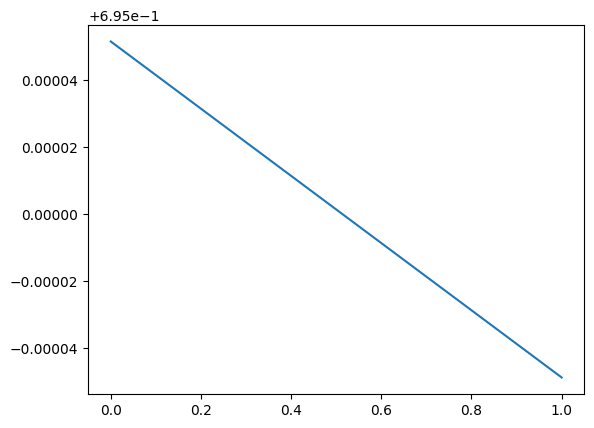


 33%|███▎      | 1/3 [00:02<00:04,  2.36s/it]

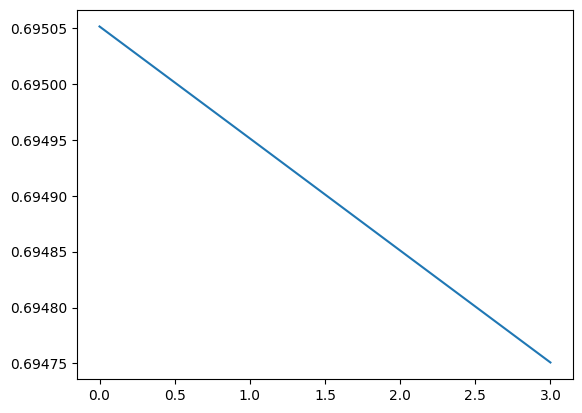


 67%|██████▋   | 2/3 [00:04<00:02,  2.39s/it]

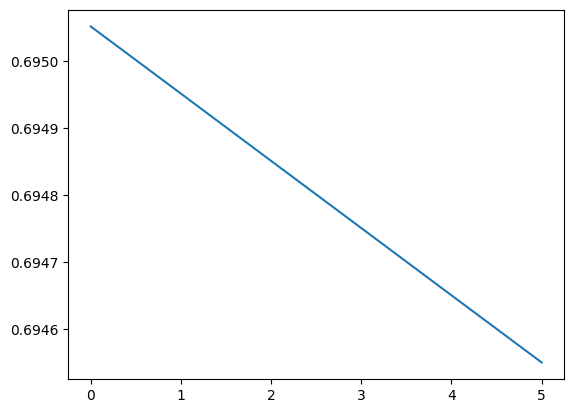

100%|██████████| 3/3 [00:07<00:00,  2.51s/it]


In [ ]:
dumb_model.train()
losses = []
for _ in tqdm(range(epochs)):
  losses.extend(train_loop())
  plt.plot(losses)
  plt.show()